In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from matplotlib import transforms
import PIL
from math import tan, atan, pi
import sympy as sp

We scale units so that the speed of light c = 1


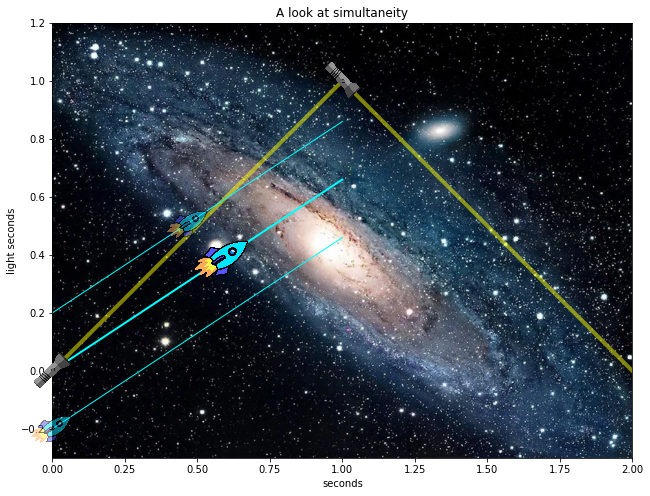

In [5]:
img = plt.imread("andromeda-galaxy.jpg")
ship = PIL.Image.open("Spaceship-clipart.png")



d = .2  # distance between adjacent ships in light seconds

# Flashlight PNG taken from https://pngtree.com/so/flashlight-clipart
flashlight = PIL.Image.open("flashlight.png").rotate(-10, PIL.Image.NEAREST, expand = 1)

# compute the gradient line of the ship
m = .66


ship_t1, ship_x1 = (d/(1-m), m*d/(1-m))


# the ship is initially set to 45° clockwise, we adjust this by calculating how much the ship deviates
# from this diagonal and adjust the rotation accordingly.
ship_adj_angle = (pi/4 - atan(m))* 180/pi
ship = ship.rotate(-45-ship_adj_angle, PIL.Image.NEAREST, expand = 1)

# Show the background galaxy image
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(img, origin='lower', extent=[0,2,-0.3,1.2])

x1 = np.linspace(0,1,100)
x2 = np.linspace(1,2,100)
y1 = x1
y2 = 1-x1
x = np.concatenate((x1,x2))
y = np.concatenate((y1, y2))

ax.plot(x,y, c="yellow", lw=4, alpha=0.5)

ax.set_xlabel("seconds")
ax.set_ylabel("light seconds")


shipx = x1*m
ax.plot(x1, shipx, c='cyan', lw=2)
ax.plot(x1, shipx+d, c='cyan', lw=1)
ax.plot(x1, shipx-d, c='cyan', lw=1)

imagebox = OffsetImage(flashlight, zoom = 0.02)
ab = AnnotationBbox(imagebox, (.0, .0), frameon = False, transform = ax.transData)
ax.add_artist(ab)

imagebox = OffsetImage(flashlight.rotate(-90, PIL.Image.NEAREST, expand = 1), zoom = 0.02)
ab = AnnotationBbox(imagebox, (1.0, 1.0), frameon = False, transform = ax.transData)
ax.add_artist(ab)

imagebox = OffsetImage(ship, zoom = 0.075, alpha=0.5)
ab = AnnotationBbox(imagebox, (0, -d), frameon = False, transform = ax.transData)
ax.add_artist(ab)

othership_x = 2*m*d/(1-m**2)
othership_y = d*(m**2+1)/(1-m**2)
imagebox = OffsetImage(ship, zoom = 0.075, alpha=0.5)
ab = AnnotationBbox(imagebox, (othership_x, othership_y), frameon = False, transform = ax.transData)
ax.add_artist(ab)

imagebox = OffsetImage(ship, zoom = 0.10)
ab = AnnotationBbox(imagebox, (ship_t1, ship_x1), frameon = False, transform = ax.transData)
ax.add_artist(ab)
plt.title("A look at simultaneity")
plt.show()